In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

### A. Initial Data Cleaning

In [2]:
og_data = pd.read_csv('diabetes_data_upload.csv')

In [3]:
og_data.rename(columns={'class': 'Diabetes Result'}, inplace=True)

In [4]:
og_data.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Diabetes Result
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


### B. Using LabelEncoder to convert binary categorical data into binary numeric data

In [5]:
enc = LabelEncoder()
og_data[['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'Diabetes Result']] = og_data[['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'Diabetes Result']].apply(enc.fit_transform)

In [6]:
og_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Diabetes Result
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [7]:
og_data.shape

(520, 17)

### C. Train, Test, and Evaluate Models


### C-1.1 Logistic Regression Training, Testing and Evaluation on Model 1

This logistics model was trained using all features. 

In [8]:
X = og_data.drop(columns=['Diabetes Result'],axis=1)
y= og_data[['Diabetes Result']]
y = np.ravel(y.values)
print(X.shape, y.shape)

(520, 16) (520,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
C_param_range = [0.001,0.01,0.1,1,10,100]

table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
table['C_parameter'] = C_param_range


j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    Logreg = LogisticRegression(penalty = 'l2', C = i,random_state = 40)
    Logreg.fit(X_train,y_train)
    
    # Predict using model
    y_pred_lr = Logreg.predict(X_test)
    
    # Saving accuracy score in table
    table.iloc[j,1] = accuracy_score(y_test,y_pred_lr)
    j += 1
    
table

,C_parameter,Accuracy
0,0.001,0.761538
1,0.010,0.915385
2,0.100,0.953846
3,1.000,0.969231
4,10.000,0.969231
5,100.000,0.969231


In [11]:
log_reg = LogisticRegression(penalty = 'l2', C=10, max_iter=1000)

log_reg.fit(X_train, y_train)
#Prediction using best C_paramater

y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

lr_accuracy= accuracy_score(y_test, y_pred_test)

print(f'Accuracy on training data: {accuracy_score(y_train, y_pred_train):.2f}')
print(f'Accuracy on testing data: {lr_accuracy:.2f}')



Accuracy on training data: 0.94
Accuracy on testing data: 0.97


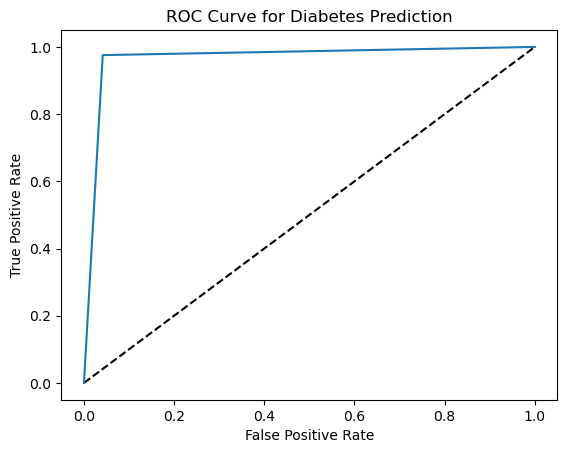

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

In [13]:
# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_test))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Calculate the classification report
print(classification_report(y_test, y_pred_test))

0.9669715447154472
[[46  2]
 [ 2 80]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        48
           1       0.98      0.98      0.98        82

    accuracy                           0.97       130
   macro avg       0.97      0.97      0.97       130
weighted avg       0.97      0.97      0.97       130



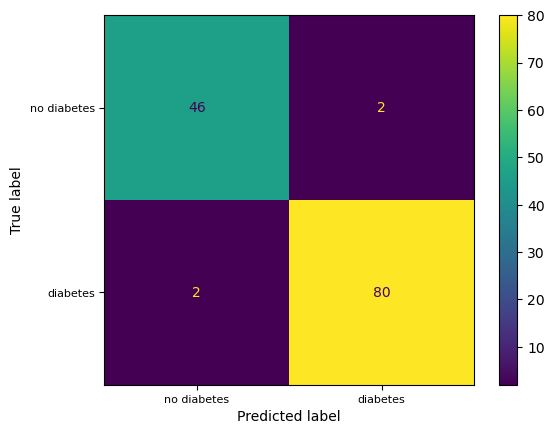

In [14]:
cm = confusion_matrix(y_pred_test, y_test, labels = log_reg.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no diabetes', 'diabetes'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no diabetes', 'diabetes'], fontsize = 8)
ax.set_yticklabels(labels = ['no diabetes', 'diabetes'], fontsize = 8)
display_cm.plot(ax = ax)

In [15]:
cv_scores_test= cross_val_score(log_reg,X_test,y_test,cv=3,scoring='roc_auc')
cv_scores_train= cross_val_score(log_reg,X_train,y_train,cv=3,scoring='roc_auc')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.94419643 0.96064815 1.        ]
Mean cross validation train score: 0.960485687101845
Mean cross validation test score: 0.9682815255731922
Standard deviation in cv test scores: 0.023412403895240335


# D- 1. K-Nearest neighbor (KNN) Model Training, Testing, and Evaluation

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
n_neighbors_range = [2,5,10,20,50,100]
table = pd.DataFrame(columns = ['n_neighbors','Accuracy'])
table['n_neighbors'] = n_neighbors_range

j = 0

for i in n_neighbors_range:
    
    # Apply knn model to training data
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    # Predict using model
    y_pred_lr = knn.predict(X_test)
    
    # Saving accuracy score in table
    table.iloc[j,1] = accuracy_score(y_test,y_pred_lr)
    j += 1
    
table

,n_neighbors,Accuracy
0,2,0.946154
1,5,0.930769
2,10,0.9
3,20,0.9
4,50,0.830769
5,100,0.815385


In [18]:
knn_p = KNeighborsClassifier(n_neighbors=2)

knn_p.fit(X_train, y_train)
#Prediction using best p_paramater

y_pred_train = knn_p.predict(X_train)
y_pred_test = knn_p.predict(X_test)

knn_p_accuracy= accuracy_score(y_test, y_pred_test)

print(f'Accuracy on training data: {accuracy_score(y_train, y_pred_train):.2f}')
print(f'Accuracy on testing data: {knn_p_accuracy:.2f}')


Accuracy on training data: 0.97
Accuracy on testing data: 0.95


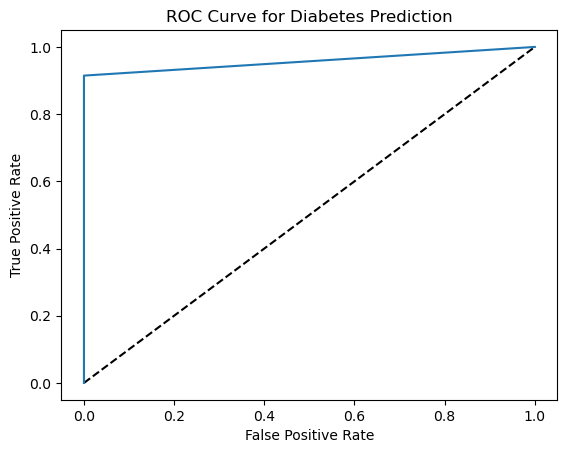

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

In [20]:
# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_test))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Calculate the classification report
print(classification_report(y_test, y_pred_test))

0.9573170731707317
[[48  0]
 [ 7 75]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        48
           1       1.00      0.91      0.96        82

    accuracy                           0.95       130
   macro avg       0.94      0.96      0.94       130
weighted avg       0.95      0.95      0.95       130



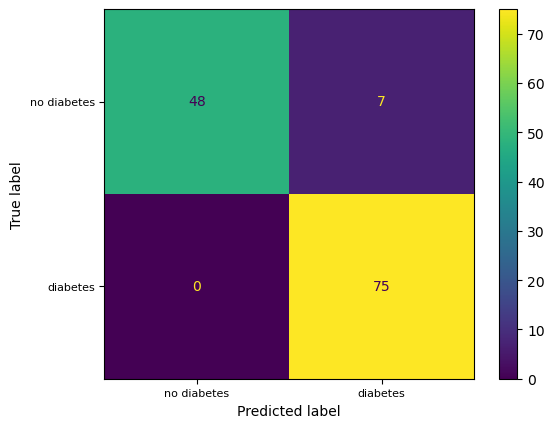

In [21]:
cm = confusion_matrix(y_pred_test, y_test, labels = knn_p.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no diabetes', 'diabetes'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no diabetes', 'diabetes'], fontsize = 8)
ax.set_yticklabels(labels = ['no diabetes', 'diabetes'], fontsize = 8)
display_cm.plot(ax = ax)

In [22]:
cv_scores_test= cross_val_score(knn_p,X_test,y_test,cv=3,scoring='roc_auc')
cv_scores_train= cross_val_score(knn_p,X_train,y_train,cv=3,scoring='roc_auc')
print(cv_scores_test)
cv_scores_knn_p_test= cv_scores_test.mean()
cv_scores_knn_p_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.89732143 0.98611111 0.9537037 ]
Mean cross validation train score: 0.960485687101845
Mean cross validation test score: 0.9682815255731922
Standard deviation in cv test scores: 0.036686068699256134


### E-1. Support Vector Machine Training, Testing and Evaluation on Model 1

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
tol_param_range = [0.001,0.01,0.1,1,10,100]

table = pd.DataFrame(columns = ['tol_parameter','Accuracy'])
table['tol_parameter'] = tol_param_range


j = 0
for i in tol_param_range:
    
    # Apply logistic regression model to training data
    svc = SVC(kernel = 'rbf', gamma = 'scale', tol = i)
    svc.fit(X_train,y_train)
    
    # Predict using model
    y_pred_lr = svc.predict(X_test)
    
    # Saving accuracy score in table
    table.iloc[j,1] = accuracy_score(y_test,y_pred_lr)
    j += 1
    
table

,tol_parameter,Accuracy
0,0.001,0.953846
1,0.010,0.961538
2,0.100,0.953846
3,1.000,0.953846
4,10.000,0.630769
5,100.000,0.630769


In [25]:
svc_c = SVC(kernel = 'rbf', gamma = 'scale', tol = 0.01)

svc_c.fit(X_train, y_train)
#Prediction using best C_paramater

y_5pred_train = svc_c.predict(X_train)
y_5pred_test = svc_c.predict(X_test)

svc_c_accuracy= accuracy_score(y_test, y_5pred_test)

print(f'Accuracy on training data: {accuracy_score(y_train, y_5pred_train):.2f}')
print(f'Accuracy on testing data: {svc_c_accuracy:.2f}')


Accuracy on training data: 0.98
Accuracy on testing data: 0.96


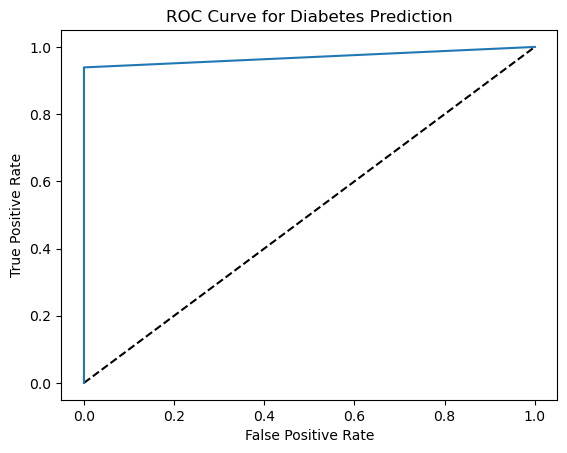

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_5pred_test)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

In [27]:
# Calculate roc_auc_score
print(roc_auc_score(y_test, y_5pred_test))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_5pred_test))

# Calculate the classification report
print(classification_report(y_test, y_5pred_test))

0.9695121951219512
[[48  0]
 [ 5 77]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        48
           1       1.00      0.94      0.97        82

    accuracy                           0.96       130
   macro avg       0.95      0.97      0.96       130
weighted avg       0.97      0.96      0.96       130



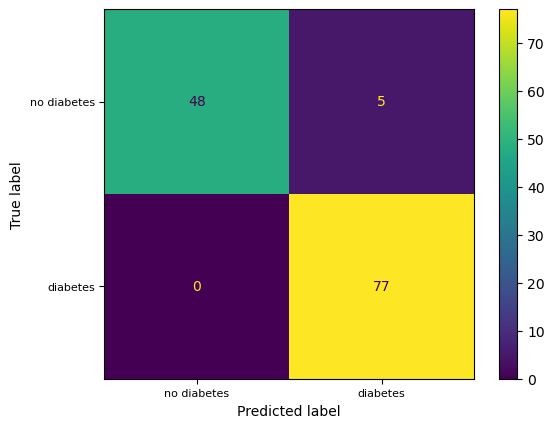

In [28]:
cm = confusion_matrix(y_5pred_test, y_test, labels = svc_c.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no diabetes', 'diabetes'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no diabetes', 'diabetes'], fontsize = 8)
ax.set_yticklabels(labels = ['no diabetes', 'diabetes'], fontsize = 8)
display_cm.plot(ax = ax)

In [29]:
cv_scores_test= cross_val_score(svc_c,X_test,y_test,cv=3,scoring='roc_auc')
cv_scores_train= cross_val_score(svc_c,X_train,y_train,cv=3,scoring='roc_auc')
print(cv_scores_test)
cv_scores_svc_c_test= cv_scores_test.mean()
cv_scores_svc_c_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.98660714 0.99768519 0.98611111]
Mean cross validation train score: 0.960485687101845
Mean cross validation test score: 0.9682815255731922
Standard deviation in cv test scores: 0.00534299395872893


### F-1. Random Forest Training, Testing, and Evaluation on Model 1

In [30]:
X = og_data.drop(columns=['Diabetes Result'],axis=1)
y= og_data[['Diabetes Result']]
y=np.ravel(y.values)
print(X.shape, y.shape)

(520, 16) (520,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
n_estimator_range = [10,100,200,400,500,1000]

table = pd.DataFrame(columns = ['n_estimator_range','Accuracy'])
table['n_estimator_range'] = n_estimator_range


j = 0
for i in n_estimator_range:
    
    # Apply logistic regression model to training data
    rfc = RandomForestClassifier(n_estimators=i, criterion = 'entropy', max_features='log2')
    rfc.fit(X_train,y_train)
    
    # Predict using model
    y_pred_lr = rfc.predict(X_test)
    
    # Saving accuracy score in table
    table.iloc[j,1] = accuracy_score(y_test,y_pred_lr)
    j += 1
    
table

,n_estimator_range,Accuracy
0,10,1.0
1,100,1.0
2,200,1.0
3,400,1.0
4,500,1.0
5,1000,1.0


In [48]:
rfc_100 = RandomForestClassifier(n_estimators=100, criterion = 'entropy', max_features='log2')

rfc_100.fit(X_train, y_train)
#Prediction using best C_paramater

y_6pred_train = rfc_100.predict(X_train)
y_6pred_test = rfc_100.predict(X_test)

rfc_100_accuracy= accuracy_score(y_test, y_6pred_test)

print(f'Accuracy on training data: {accuracy_score(y_train, y_6pred_train):.2f}')
print(f'Accuracy on testing data: {rfc_100_accuracy:.2f}')


Accuracy on training data: 1.00
Accuracy on testing data: 1.00


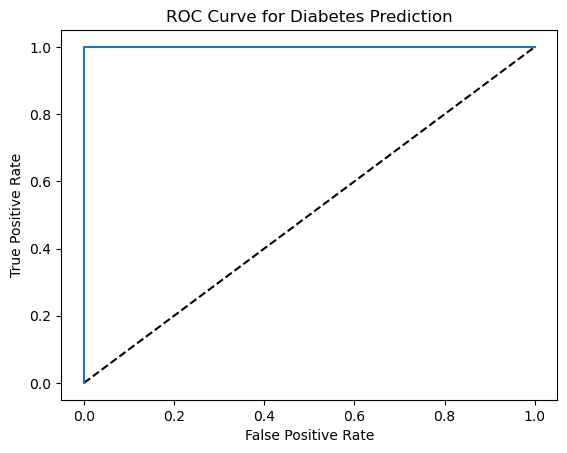

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_6pred_test)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

In [50]:
# Calculate roc_auc_score
print(roc_auc_score(y_test, y_6pred_test))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_6pred_test))

# Calculate the classification report
print(classification_report(y_test, y_6pred_test))

1.0
[[48  0]
 [ 0 82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        82

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130



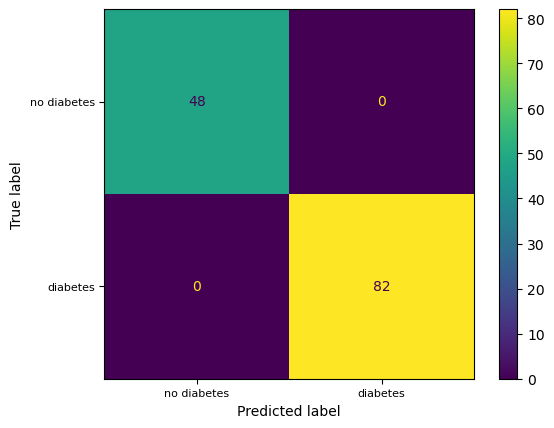

In [51]:
cm = confusion_matrix(y_test, y_6pred_test, labels = rfc_100.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no diabetes', 'diabetes'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no diabetes', 'diabetes'], fontsize = 8)
ax.set_yticklabels(labels = ['no diabetes', 'diabetes'], fontsize = 8)
display_cm.plot(ax = ax)

In [52]:
cv_scores_test= cross_val_score(rfc_100,X_test,y_test,cv=3,scoring='roc_auc')
cv_scores_train= cross_val_score(rfc_100,X_train,y_train,cv=3,scoring='roc_auc')
print(cv_scores_test)
cv_scores_rfc_100_test= cv_scores_test.mean()
cv_scores_rfc_100_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.98883929 1.         0.9837963 ]
Mean cross validation train score: 0.9923525275088938
Mean cross validation test score: 0.9886188271604938
Standard deviation in cv test scores: 0.006770469369538424


### G-1. Gradient Boosting Training, Testing, and Evaluation on Model 1

In [38]:
X = og_data.drop(columns=['Diabetes Result'],axis=1)
y= og_data[['Diabetes Result']]
y = np.ravel(y.values)
print(X.shape, y.shape)

(520, 16) (520,)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
learning_rate_range = [0.001,0.01,0.1,1]

table = pd.DataFrame(columns = ['learning_rate_range','Accuracy'])
table['learning_rate_range'] = learning_rate_range


j = 0
for i in learning_rate_range:
    
    # Apply logistic regression model to training data
    gb = GradientBoostingClassifier(learning_rate=i, random_state = 43)
    gb.fit(X_train,y_train)
    
    # Predict using model
    y_pred_lr = gb.predict(X_test)
    
    # Saving accuracy score in table
    table.iloc[j,1] = accuracy_score(y_test,y_pred_lr)
    j += 1
    
table

,learning_rate_range,Accuracy
0,0.001,0.630769
1,0.010,0.953846
2,0.100,0.969231
3,1.000,0.969231


In [41]:
gb_01 = GradientBoostingClassifier(loss='exponential', learning_rate=0.1, n_estimators=100, subsample=0.3, criterion='squared_error', random_state = 43)

gb_01.fit(X_train, y_train)
#Prediction using best C_paramater

y_7pred_train = gb_01.predict(X_train)
y_7pred_test = gb_01.predict(X_test)

gb_01_accuracy= accuracy_score(y_test, y_7pred_test)

print(f'Accuracy on training data: {accuracy_score(y_train, y_7pred_train):.2f}')
print(f'Accuracy on testing data: {gb_01_accuracy:.2f}')


Accuracy on training data: 0.99
Accuracy on testing data: 0.96


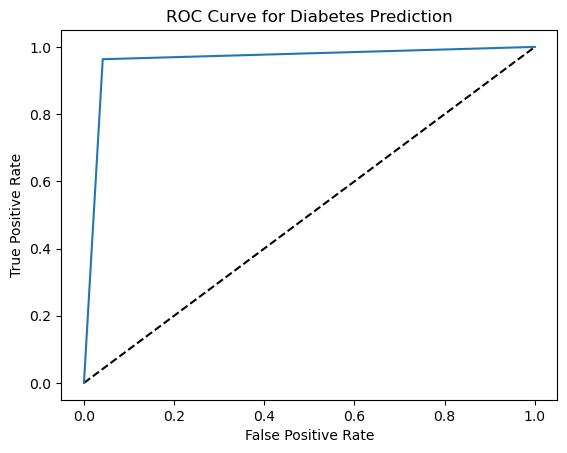

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_7pred_test)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

In [43]:
# Calculate roc_auc_score
print(roc_auc_score(y_test, y_7pred_test))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_7pred_test))

# Calculate the classification report
print(classification_report(y_test, y_7pred_test))

0.9608739837398373
[[46  2]
 [ 3 79]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        48
           1       0.98      0.96      0.97        82

    accuracy                           0.96       130
   macro avg       0.96      0.96      0.96       130
weighted avg       0.96      0.96      0.96       130



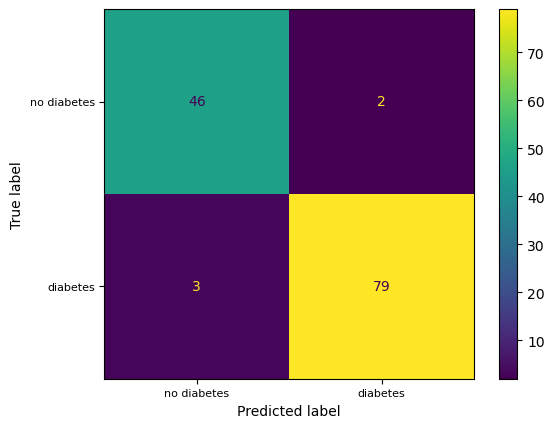

In [44]:
cm = confusion_matrix(y_test, y_7pred_test, labels = gb_01.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no diabetes', 'diabetes'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no diabetes', 'diabetes'], fontsize = 8)
ax.set_yticklabels(labels = ['no diabetes', 'diabetes'], fontsize = 8)
display_cm.plot(ax = ax)

In [45]:
cv_scores_test= cross_val_score(gb_01,X_test,y_test,cv=3,scoring='roc_auc')
cv_scores_train= cross_val_score(gb_01,X_train,y_train,cv=3,scoring='roc_auc')
print(cv_scores_test)
cv_scores_gb_01_test= cv_scores_test.mean()
cv_scores_gb_01_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.97767857 0.99768519 0.96759259]
Mean cross validation train score: 0.9923525275088938
Mean cross validation test score: 0.9886188271604938
Standard deviation in cv test scores: 0.012505801729285913


### H - 1. Comparison of the models:

We applied different ML models above and evaluated their performances in terms of ROC-AUC score for both the training and test data. Here we have tabulated the scores and plotted them.

All of the ML models that were evaluated had successful accuracy performances. However, when evaluating for accuracy and the ROC/AUC scores b/w the training and the testing data, we want to select the models that performed better with the testing data. Thus, SVM and Random Forest will be chosen for randomized gridsearch / hyperparamater tuning.

In [53]:
myLabels = ['Logistic Regression Model 1', 'KNN','SVM','Random Forest','Gradient Boost']

score_train= [cv_scores_lr_train, cv_scores_knn_p_train, cv_scores_svc_c_train, cv_scores_rfc_100_train, cv_scores_gb_01_train]

score_test= [cv_scores_lr_test, cv_scores_knn_p_test, cv_scores_svc_c_test, cv_scores_rfc_100_test, cv_scores_gb_01_test]

Accuracy_score = [lr_accuracy, knn_p_accuracy, svc_c_accuracy, rfc_100_accuracy, gb_01_accuracy]

score_tab_acc = pd.DataFrame(list(zip(myLabels, Accuracy_score)), 
               columns =['Algorithm', 'Model accuracy score']) 

score_tab = pd.DataFrame(list(zip(myLabels, score_train, score_test)), 
               columns =['Algorithm', 'ROC-AUC train score', 'ROC-AUC test score' ]) 
print(score_tab_acc)

score_tab

                     Algorithm  Model accuracy score
0  Logistic Regression Model 1              0.969231
1                          KNN              0.946154
2                          SVM              0.961538
3                Random Forest              1.000000
4               Gradient Boost              0.961538


,Algorithm,ROC-AUC train score,ROC-AUC test score
0,Logistic Regression Model 1,0.992353,0.988619
1,KNN,0.970383,0.945712
2,SVM,0.985362,0.990134
3,Random Forest,0.992687,0.990879
4,Gradient Boost,0.982628,0.980985


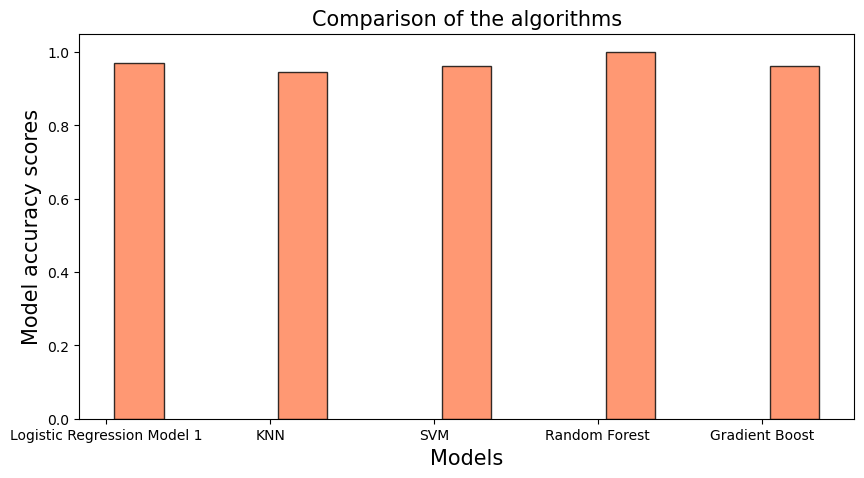

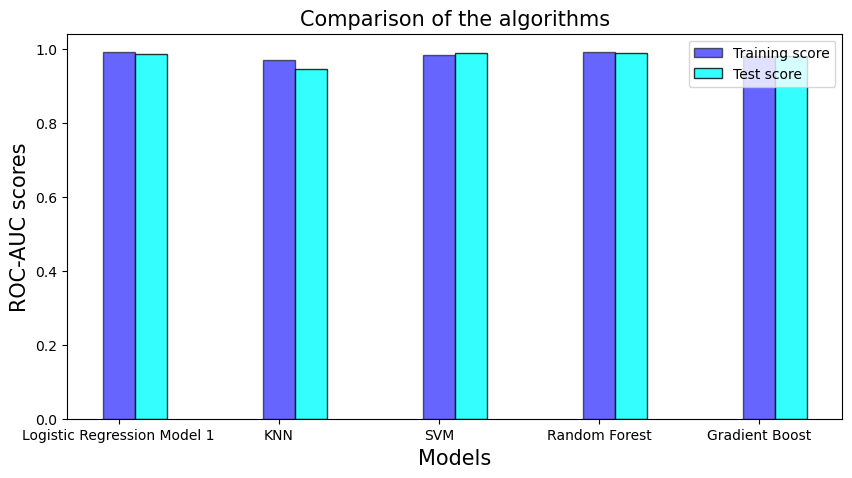

In [54]:
#plotting the accuracy scores:


index=[1,2,3,4,5]
index_acc=[1.2,2.2,3.2,4.2,5.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model accuracy scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
#patterns = [ "/"]
_=plt.bar(index_acc,Accuracy_score,color='coral',alpha=0.8,label='Accuracy score',edgecolor='k',width=0.3)
plt.xticks([1,2,3,4,5], myLabels)
#plt.legend()
plt.show()

#plotting and comparing ROC-AUC train/test scores:

index=[1,2,3,4,5]
index_acc=[1.2,2.2,3.2,4.2,5.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('ROC-AUC scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
_=plt.bar(index,score_train,color='b',alpha=0.6,label='Training score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,score_test,color='cyan',alpha=0.8,label='Test score',edgecolor='k',width=0.2)
plt.xticks([1, 2,3,4,5], myLabels)
plt.legend()
plt.show()

### I -1. Application of Randomized Gridsearch CV for hyperparamater tuning:

#### I - 1.1 Paramater Tuning for SVM

In [58]:
svc_c = SVC(kernel = 'rbf', gamma = 'scale', tol = 0.01)

param_grid = { "C": [1,5,10], "degree" : [1, 5, 10], "cache_size": [50, 100,400,700,1000], "decision_function_shape": ['ovo', 'ovr']}

rgs = RandomizedSearchCV(estimator=svc_c, param_distributions=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

rgs = rgs.fit(X_train, y_train)

print(rgs.best_estimator_) 
print(rgs.best_score_)

SVC(C=5, cache_size=50, decision_function_shape='ovo', degree=5, tol=0.01)
0.9512820512820513


#### I - 1.2 Fitting the SVM model with the optimal hyperparamaters

In [61]:
svc_final = SVC(C=5, kernel = 'rbf', degree=5, gamma = 'scale', tol = 0.01, cache_size=50, decision_function_shape='ovo')
svc_final.fit(X_train, y_train)
y_predictions_svc = svc_final.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_predictions_svc)
cv_svc = cross_val_score(svc_final, X_test, y_test,scoring='roc_auc').mean()
print(accuracy_svc)
print(cv_svc)

0.9846153846153847
0.9884068627450981


In [74]:
#Final prediction SVM:

target = pd.Series(y_predictions_svc, name='Prediction_Diabetes')

output = pd.DataFrame(list(zip(target)), 
               columns =['Diabetes Result']) 




output.to_csv('final_result_SVM.csv', index=False, header=True)

In [76]:
# Calculate roc_auc_score
print(roc_auc_score(y_test, y_predictions_svc))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_predictions_svc))

# Calculate the classification report
print(classification_report(y_test, y_predictions_svc))

0.9878048780487805
[[48  0]
 [ 2 80]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.98      0.99        82

    accuracy                           0.98       130
   macro avg       0.98      0.99      0.98       130
weighted avg       0.99      0.98      0.98       130



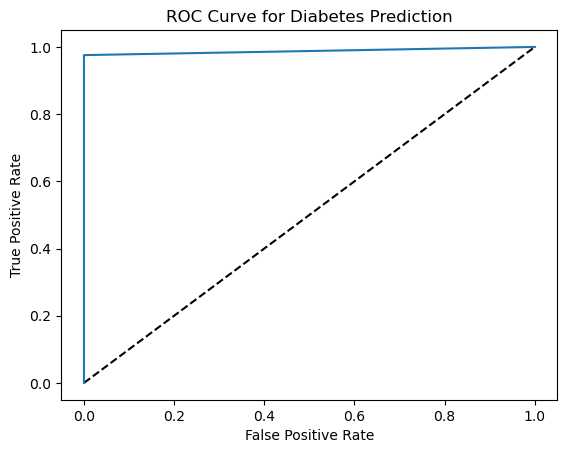

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, y_predictions_svc)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

#### I - 2.1 Paramater Tuning of Random Forest

In [81]:
rfc_100 = RandomForestClassifier(n_estimators=100, criterion = 'entropy', max_features='log2')

param_grid = { "n_estimators": [50, 100, 400, 500, 1000], "max_depth": [10, 50, 100, 300], "min_samples_split" : [2, 10, 20], "min_samples_leaf": [50, 100,400,700,1000], "min_weight_fraction_leaf": [0.001,0.01,0.1,1,10,100]}

rgs_rfc = RandomizedSearchCV(estimator=rfc_100, param_distributions=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

rgs_rfc = rgs_rfc.fit(X_train, y_train)

print(rgs_rfc.best_estimator_) 
print(rgs_rfc.best_score_)

/Users/alexyeo/Documents/temp/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
21 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/alexyeo/Documents/temp/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alexyeo/Documents/temp/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/Users/alexyeo/Documents/temp/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 600, in

RandomForestClassifier(criterion='entropy', max_depth=50, max_features='log2',
                       min_samples_leaf=400, min_samples_split=10,
                       min_weight_fraction_leaf=0.01, n_estimators=400)
0.6102564102564102


#### I - 2.2 Fitting the Random Forest Model with Optimal Hyperparamaters

In [84]:
rfc_final = RandomForestClassifier(criterion='entropy', max_depth=50, max_features='log2',
                       min_samples_leaf=400, min_samples_split=10,
                       min_weight_fraction_leaf=0.01, n_estimators=400)
rfc_final.fit(X_train, y_train)
y_predictions_rfc = rfc_final.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_predictions_rfc)
cv_rfc = cross_val_score(rfc_final, X_test, y_test,scoring='roc_auc').mean()
print(accuracy_rfc)
print(cv_rfc)

0.6307692307692307
0.5


Since tuning the random forest hyperparamaters had worsened our model's performance. We will maintain the original random forest classifier model. 

In [93]:
#Final prediction SVM:

target = pd.Series(y_6pred_test, name='Prediction_Diabetes')

output = pd.DataFrame(list(zip(target)), 
               columns =['Diabetes Result']) 




output.to_csv('final_result_rfc.csv', index=False, header=True)

16


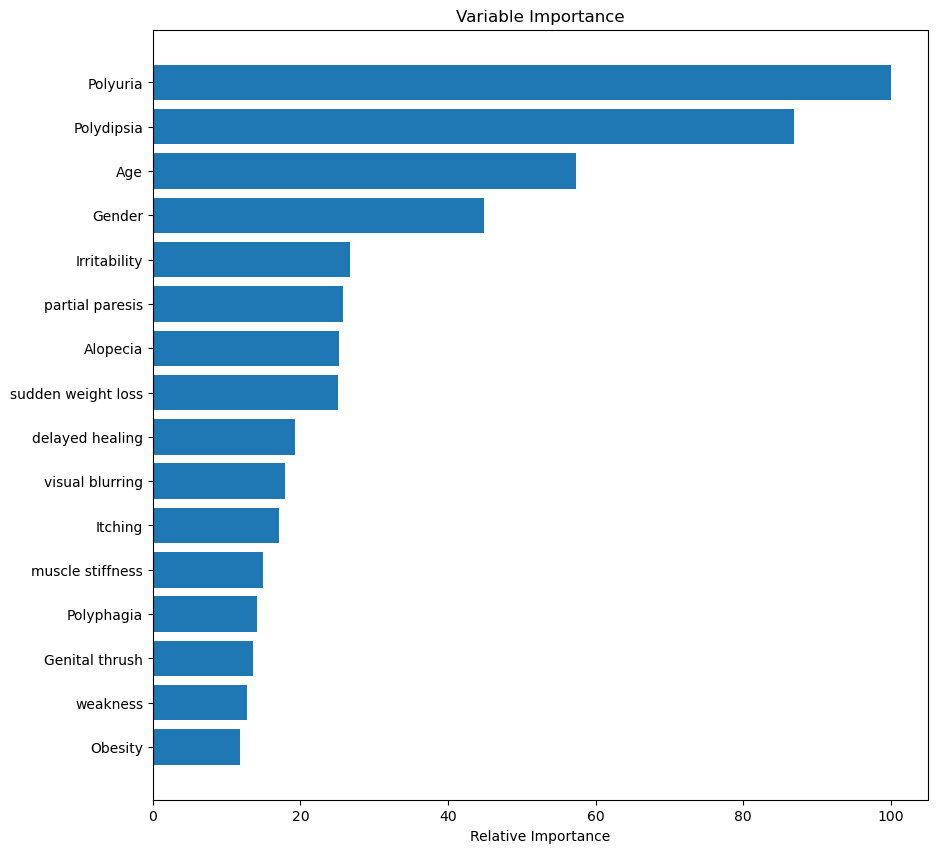

In [94]:
feature_importance = rfc_100.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### J - Conclusion


In order to predict the diagnosis of diabetes, here we have considered sixteen (16) features. Interestingly, the engineeered features are the most important ones in terms of relative importances.

Throughout the model training, testing and evaluation, we have used the following classification models:

- Logistic Regression
- K-Nearest Neighbor (KNN)
- Support vector machine (SVM)
- Random Forest
- Gradient Boost

We have evaluated each models in terms of model accuracy score, and 'ROC-AUC' score for both the training and test data, and visualized them. The two best performing models are the Random forest and the SVM.

We performed the randomized grid search CV for the hyperparameter tuning for both the models seperately. Randomized gridsearch cross validation was chosen in order to remedy the long time gradient search CV takes. With the result of the optimized hyperparameters, we have again fitted the two models, and got the predictions seperately. The result of fitting the models with the optimal hyperparamaters resulted in better accuracy for the SVM model, while fitting the models with the optimal hyperparamaters resulted in significantly worse accuracy for the random forest model. Thus, we reverted to the original random forest model with original paramaters. The final ROC-AUC scores for both SVM and the Random Forest are  are 0.987 and 1.0, respectively. 

The final prediction tables (One column: Diabetes Result) are saved as csv files. Thus, moving forward, the random forest model should be suggested in most accurately predicting diabetes. 